In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56423_I')

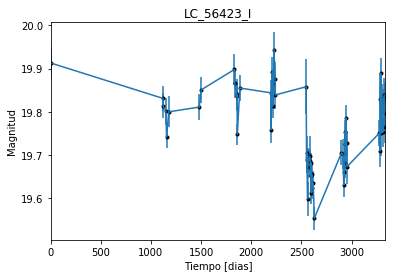

In [2]:
data = np.genfromtxt('LC_56423_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56423_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

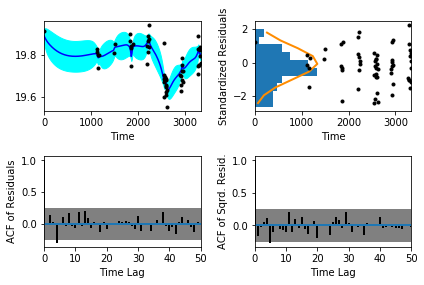

In [5]:
sample.assess_fit()

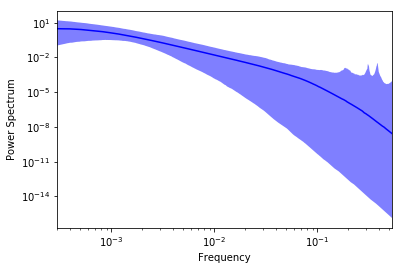

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56423_I')

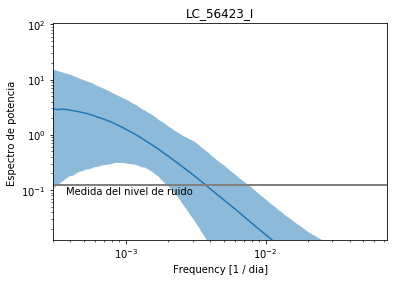

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56423_I')

Text(0.5,1,'Prediccion , valor esperado LC_56423_I')

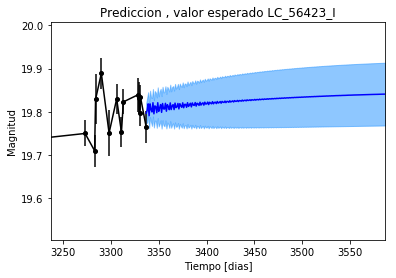

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56423_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56423_I')

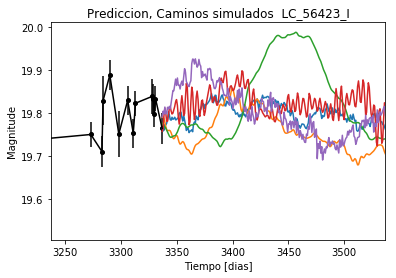

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56423_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56423_I')

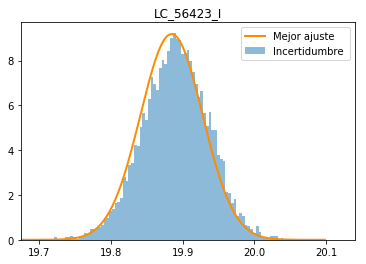

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56423_I')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_I')

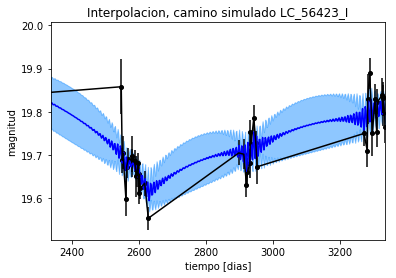

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_I')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_I')

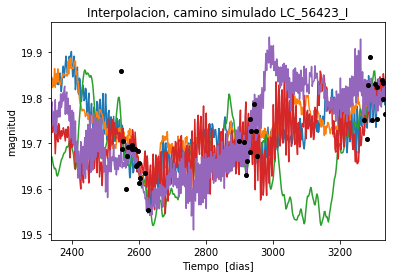

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 593.714230787
Median: 0.011181419582
Standard deviation: 0.191344286689
68% credibility interval: [ 0.00138389  0.16289648]
95% credibility interval: [  3.85131408e-04   7.76369395e-01]
99% credibility interval: [  3.14652744e-04   9.76943915e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 720.052288821
Median: 0.005005351153
Standard deviation: 0.0892365969233
68% credibility interval: [ 0.0006555   0.04446035]
95% credibility interval: [ 0.00033355  0.29653159]
99% credibility interval: [  3.05675997e-04   6.10054812e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 609.740061302
Median: 0.0641495329324
Standard dev

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 547.933974427
Median: 118.602137842
Standard deviation: 2.24452583944
68% credibility interval: [ 116.64122345  120.47410357]
95% credibility interval: [ 114.27149731  124.09148621]
99% credibility interval: [ 112.41167847  124.64460943]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1155.55397295
Median: 1.0333181778
Standard deviation: 2.3578291197
68% credibility interval: [ 0.14108754  4.42927002]
95% credibility interval: [ 0.03867741  8.06989213]
99% credibility interval: [  0.01608546  11.35188415]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 538.681686575
Median: 2.02847531845
Standard deviation: 10.4383863537
68% credibility interval: [  0.08249629  15.44461185]
95% credibility interval: [  2.88527759e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16635.4538587
Median: 1.30117261243e-15
Standard deviation: 1.79034060953e+95
68% credibility interval: [  2.04544051e-56   5.68035112e+24]
95% credibility interval: [  4.55563638e-103   2.22702056e+064]
99% credibility interval: [  1.06367055e-123   1.23683914e+090]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1774.74397979
Median: 19.7930508
Standard deviation: 0.0443969765859
68% credibility interval: [ 19.76049076  19.83438005]
95% credibility interval: [ 19.71533803  19.89599292]
99% credibility interval: [ 19.66645013  19.95173183]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 349.11710276
Median: 0.109039112743
Standard deviation: 0.278816737602
68% credibility interval: [ 0.          0.61288981]
95% credibility interval: [ 0.         0.9285219]
99% credibility interval: [ 0.          1.03362139]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 349.11710276
Median: 0.109039112743
Standard deviation: 0.278816737602
68% credibility interval: [ 0.          0.61288981]
95% credibility interval: [ 0.         0.9285219]
99% credibility interval: [ 0.          1.03362139]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2924.3819219
Median: 0.0
Standard deviation: 0.00049570258031
68% credibility 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 547.933974427
Median: 118.602137842
Standard deviation: 2.24452583944
68% credibility interval: [ 116.64122345  120.47410357]
95% credibility interval: [ 114.27149731  124.09148621]
99% credibility interval: [ 112.41167847  124.64460943]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1889.24067956
Median: 0.00878252248177
Standard deviation: 0.00805381826106
68% credibility interval: [ 0.00530148  0.01532761]
95% credibility interval: [ 0.00345231  0.02950165]
99% credibility interval: [ 0.00263677  0.053779  ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 752.602965447
Median: 1.29004312202
Standard deviation: 0.251326911004
68% credibility interval: [ 1.05701977  1.56495685]
95% credibility interval: [ 0.82275381  1.82752079]
99% credibility interval: [ 0.75487088  1.9474265 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 324.959290573
Median: 0.000897522683368
Standard deviation: 0.182768498272
68% credibility interval: [  2.90393873e-27   5.93563077e-02]
95% credibility interval: [  2.11749195e-69   5.96996915e-01]
99% credibility interval: [  1.03182914e-93   1.28691025e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 593.714230787
Median: (-0.0702549312313-0.248773343672j)
Standard deviation: 2.12471473065
68% credibility interval: [-1.02350879+0.j         -0.00869522-1.95255249j]
95% credibility interval: [ -4.87807277e+00+0.j          -2.41985200e-03-0.02464478j]
99% credibility interval: [ -6.13831965e+00+0.j          -1.97702150e-03-0.14232503j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 720.052288821
Median: (-0.0314495488218+1.987675236j)
Standard deviation: 1.83939585488
68% credibility interval: [-0.27935259+0.83479432j -0.00411863+1.96553926j]
95% credibility interval: [-1.86316292+4.4952326j -0.00209575+0.j       ]
99% credibility interval: [ -3.83308743e+00+1.04195191j  -1.92061893e-03+0.00115907j]
Posterior summary